<a href="https://colab.research.google.com/github/harshitasakhare/Python-/blob/main/Vaccination_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
# COVID-19 Vaccination Data Analysis
# Author: [Your Name]
# Date: [Today's Date]

# =============================
# 1. Import Required Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime


In [107]:
# Optional: display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

# =============================
# 2. Load the Dataset
# =============================
# Source: Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

In [108]:
print("Data shape:", df.shape)
df.head()

Data shape: (429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [109]:
# =============================
# 3. Basic Cleaning & Filtering
# =============================
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Keep relevant columns
columns = [
    'location', 'date', 'total_vaccinations',
    'people_vaccinated', 'people_fully_vaccinated',
    'total_boosters', 'population'
]
vacc_df = df[columns]

In [110]:
# Drop rows without vaccinations
vacc_df = vacc_df[vacc_df['total_vaccinations'].notna()]
vacc_df.head()

,location,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population
414,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,41128772
420,Afghanistan,2021-02-28,8200.0,8200.0,NaN,NaN,41128772
436,Afghanistan,2021-03-16,54000.0,54000.0,NaN,NaN,41128772
458,Afghanistan,2021-04-07,120000.0,120000.0,NaN,NaN,41128772
473,Afghanistan,2021-04-22,240000.0,240000.0,NaN,NaN,41128772


In [111]:
# =============================
# 4. Country-wise Analysis
# =============================
# Select a country
country = "India"
country_df = vacc_df[vacc_df['location'] == country]

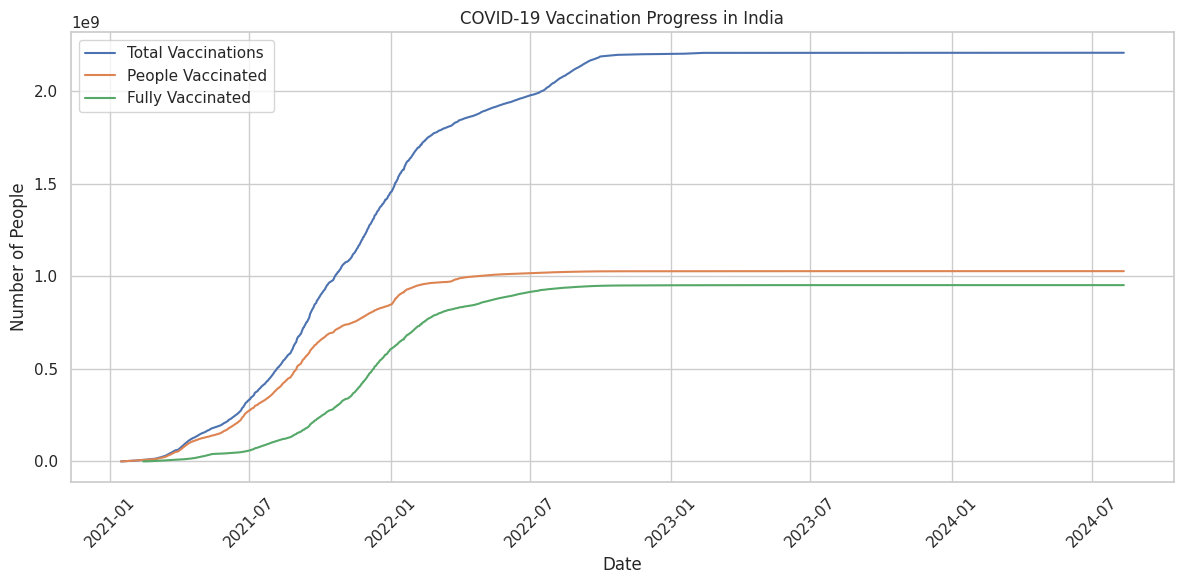

In [112]:
# Plot total vaccinations over time
plt.figure(figsize=(12,6))
sns.lineplot(data=country_df, x='date', y='total_vaccinations', label='Total Vaccinations')
sns.lineplot(data=country_df, x='date', y='people_vaccinated', label='People Vaccinated')
sns.lineplot(data=country_df, x='date', y='people_fully_vaccinated', label='Fully Vaccinated')
plt.title(f"COVID-19 Vaccination Progress in {country}")
plt.xlabel("Date")
plt.ylabel("Number of People")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [113]:
# =============================
# 5. Top 10 Countries by Vaccination
# =============================
latest = vacc_df.sort_values("date").drop_duplicates("location", keep='last')
top10 = latest.sort_values(by='total_vaccinations', ascending=False).head(10)

/tmp/ipython-input-114-3921423504.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




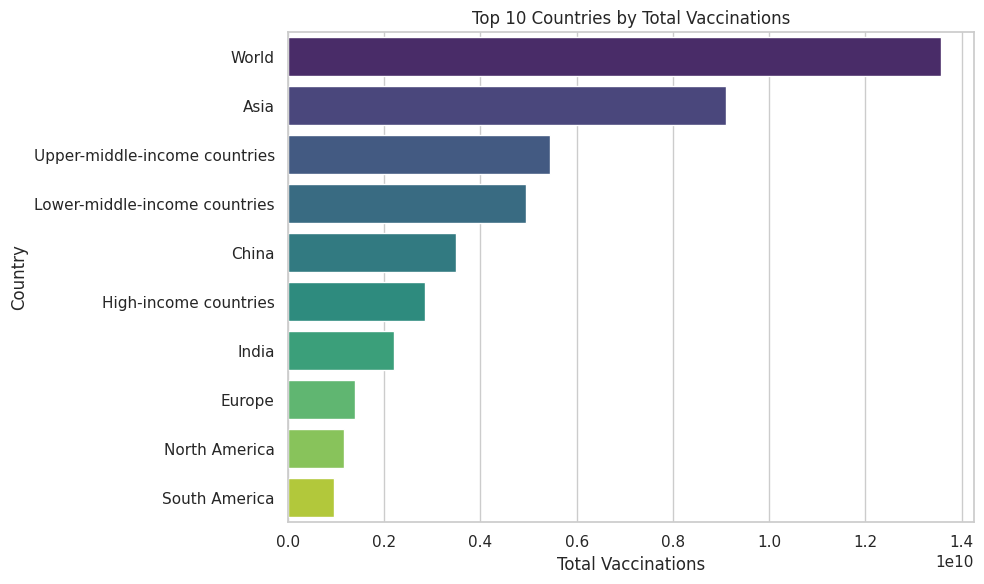

In [114]:
# Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=top10, y='location', x='total_vaccinations', palette='viridis')
plt.title("Top 10 Countries by Total Vaccinations")
plt.xlabel("Total Vaccinations")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [115]:
# =============================
# 6. Interactive Map using Plotly
# =============================
fig = px.choropleth(
    latest,
    locations="location",
    locationmode="country names",
    color="people_vaccinated",
    hover_name="location",
    color_continuous_scale="YlGnBu",
    title="People Vaccinated per Country"
)
fig.show()

In [116]:
# =============================
# 7. Predictive Modeling (Linear Regression)
# =============================
from sklearn.linear_model import LinearRegression

# Prepare data for India
india = country_df.dropna(subset=['total_vaccinations'])
india['days'] = (india['date'] - india['date'].min()).dt.days

X = india[['days']]
y = india['total_vaccinations']

model = LinearRegression()
model.fit(X, y)

# Predict next 30 days
future_days = pd.DataFrame({'days': np.arange(india['days'].max()+1, india['days'].max()+31)})
predictions = model.predict(future_days)



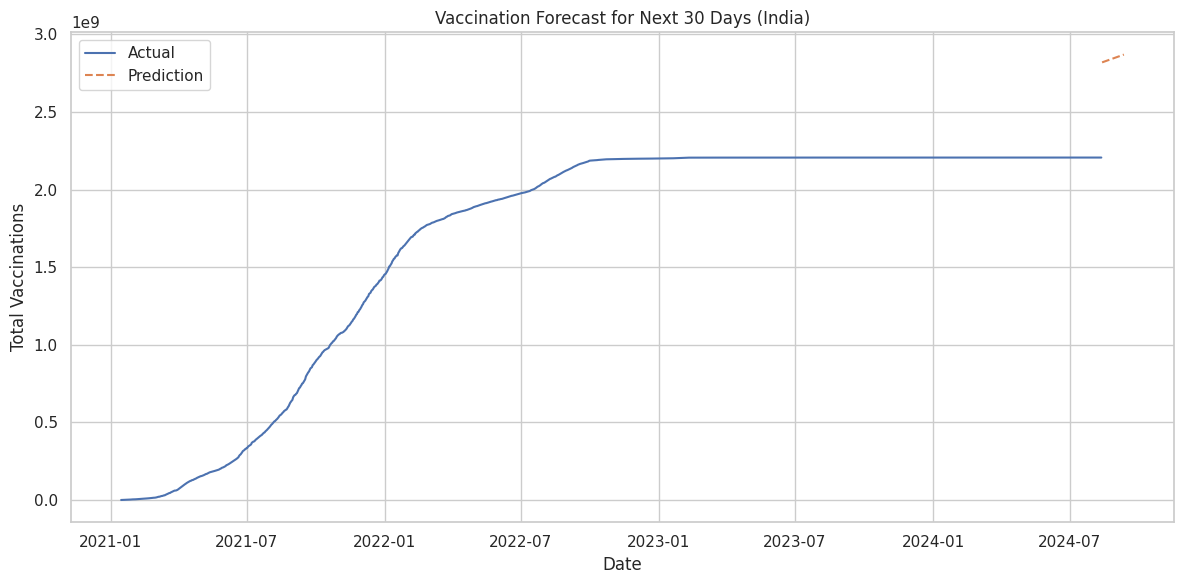

In [117]:
# Plot prediction
plt.figure(figsize=(12,6))
plt.plot(india['date'], y, label='Actual')
future_dates = india['date'].max() + pd.to_timedelta(future_days['days'] - india['days'].max(), unit='d')
plt.plot(future_dates, predictions, label='Prediction', linestyle='--')
plt.title("Vaccination Forecast for Next 30 Days (India)")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()

In [118]:
# =============================
# 8. Summary Statistics
# =============================
vacc_summary = latest[['location', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population']]
vacc_summary['% Fully Vaccinated'] = (vacc_summary['people_fully_vaccinated'] / vacc_summary['population']) * 100
vacc_summary.sort_values(by='% Fully Vaccinated', ascending=False).head(10)

/tmp/ipython-input-118-2079244457.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,location,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,% Fully Vaccinated
144835,Gibraltar,132810.0,42175.0,41465.0,32677,126.893534
384428,Tokelau,5374.0,2203.0,2203.0,1893,116.376123
312279,Qatar,7609178.0,2852178.0,2852178.0,2695131,105.827064
401000,United Arab Emirates,24922054.0,9991089.0,9792266.0,9441138,103.719128
305332,Pitcairn,117.0,47.0,47.0,47,100.000000
54854,Brunei,1293100.0,451149.0,446714.0,449002,99.490425
225269,Macao,1802985.0,679703.0,642266.0,695180,92.388446
170200,Hong Kong,21014839.0,6920120.0,6803327.0,7488863,90.845927
346870,Singapore,14727569.0,5137637.0,5093804.0,5637022,90.363387
88621,Cuba,45995747.0,10805570.0,10053658.0,11212198,89.667146


from matplotlib import pyplot as plt
_df_0['total_vaccinations'].plot(kind='hist', bins=20, title='total_vaccinations')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['people_vaccinated'].plot(kind='hist', bins=20, title='people_vaccinated')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['people_fully_vaccinated'].plot(kind='hist', bins=20, title='people_fully_vaccinated')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['population'].plot(kind='hist', bins=20, title='population')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='total_vaccinations', y='people_vaccinated', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='people_vaccinated', y='people_fully_vaccinated', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='people_fully_vaccinated', y='population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='population', y='% Fully Vaccinated', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['total_vaccinations'].plot(kind='line', figsize=(8, 4), title='total_vaccinations')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['people_vaccinated'].plot(kind='line', figsize=(8, 4), title='people_vaccinated')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['people_fully_vaccinated'].plot(kind='line', figsize=(8, 4), title='people_fully_vaccinated')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['population'].plot(kind='line', figsize=(8, 4), title='population')
plt.gca().spines[['top', 'right']].set_visible(False)